### Prediction iris data using Logistic Regression

-------------------------------------------------------

#### Logistic Regression is a machine learning algorithm which is used when the dependent variable (target) is categorical.


In [48]:
#Library version

import sys
print('Python version : {} '.format(sys.version))

import numpy as np
print('Numpy version : {} '.format(np.__version__))

import pandas as pd
print('Pandas version: {}'.format(pd.__version__))

import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python version : 3.7.7 (default, Mar 23 2020, 23:19:08) [MSC v.1916 64 bit (AMD64)] 
Numpy version : 1.18.1 
Pandas version: 1.0.3
sklearn: 0.22.1


In [75]:
#libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [49]:
#laod the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names =['sepal-length','sepal-width','petal-length','petal-width','class']

dataset = pd.read_csv(url, names=names)

In [50]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [51]:
#shape of dataset
print(dataset.shape)

(150, 5)


In [52]:
# Number of sample dataset of each class 
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [53]:
#Split the dataset into features and output
# X contains feautures of dataset
# Y contains output class

array = dataset.values

X = array[:,:4]
Y = array[:,4]



In [60]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5.0, 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3.0, 1.4, 0.1],
       [4.3, 3.0, 1.1, 0.1],
       [5.8, 4.0, 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1.0, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5.0, 3.0, 1.6, 0.2],
       [5.0, 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [57]:
#split dataset into train dataset and test dataset

seed = 0.8
validation_size = 6
x_train,x_test,y_train,y_test = train_test_split(X,Y, train_size = seed, random_state=validation_size, shuffle = True)

In [64]:
#train the clf classifier 
clf = LogisticRegression().fit(x_train,y_train)

In [65]:
#predict the output using x_test dataset
y_pred = clf.predict(x_test)

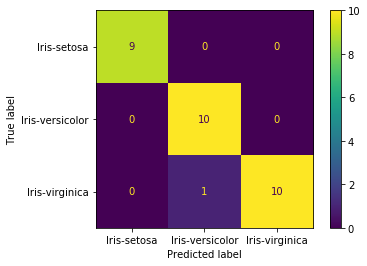

Accuracy: 96.66666666666667 %
Precision: 96.66666666666667 %
Recall: 96.66666666666667 %


In [79]:
'''
Confusion matrix : Confusion matrix is N X N matrix is used to evaluate the performances of 
the machine learning model. This matrix compares with actual output values with machine learning 
predict's output values.
                            Predicted value
                    positive       |   negative
                 |-----------------|---------------|
        positive |   tp            |    fn         |
                 |                 |               |
actual value     |-----------------|---------------|
                 |  fp             |     tn        |
        negative |                 |               |
                 |-----------------|---------------|

        where, 
                tp - true positive
                fn - false negative
                fp - false positive
                tn - true negative
                
        accuracy : accuracy is the ratio of (tp + tn)/ (tp + fn + fp + tn). The accuracy is 
        intuitively that how correctly our predict the actual output.
        
        Precision: Precision is the ration of ( tp / (tp + fp)) . The precision is intuitively the 
        ability not to label as a sample that is negative.
        
        Recall : The recall is the ratio of tp / tp+ fn . The recall is intuitively the ability of the
        classifier to find all the positive samples.
        

'''

plot_confusion_matrix(clf,x_test,y_test)
plt.show()
print('Accuracy: '+ str(accuracy_score(y_test,y_pred)*100)+' %')
print('Precision: '+ str(precision_score(y_test,y_pred, average ='micro')*100) + ' %' )
print('Recall: ' + str(recall_score(y_test,y_pred, average = 'micro')*100) + ' %')